# In this notebook, we will create an overview of the match statistics

In [106]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
match_data = pd.read_pickle("../data/df_matches_grouped.pkl")

**We start off by checking that the integrity of the data types was kept**

Below, we can confirm that they were

In [5]:
match_data.dtypes

match_id         int64
match_seq_num    int64
radiant_win       bool
start_time       int64
duration         int64
avg_mmr          int64
radiant_1        int64
radiant_2        int64
radiant_3        int64
radiant_4        int64
radiant_5        int64
dire_1           int64
dire_2           int64
dire_3           int64
dire_4           int64
dire_5           int64
dtype: object

### 1. Let's start off by counting how many times each hero was picked

In [6]:
match_data

,match_id,match_seq_num,radiant_win,start_time,duration,avg_mmr,radiant_1,radiant_2,radiant_3,radiant_4,radiant_5,dire_1,dire_2,dire_3,dire_4,dire_5
0,5510478612,4620417806,True,1594586690,2721,3174,7,70,8,30,105,119,73,90,31,18
1,5510478615,4620399961,False,1594586691,1155,3623,86,49,84,75,57,40,120,30,1,60
2,5510478700,4620425526,False,1594586691,3281,3243,108,71,8,26,47,59,74,30,21,14
3,5510478702,4620421211,True,1594586695,2988,2405,34,8,10,86,53,48,18,25,85,75
4,5510478708,4620414900,True,1594586700,2277,4464,67,22,37,107,14,74,7,84,45,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,5513436913,4623081152,False,1594771169,2254,3031,69,63,84,7,44,2,45,22,27,73
99996,5513436918,4623070259,True,1594771180,1688,5019,86,53,1,19,84,104,39,113,26,54
99997,5513437003,4623069709,False,1594771184,1790,864,15,108,21,30,53,126,104,110,4,84
99998,5513437208,4623072527,True,1594771189,1928,4327,27,93,6,84,81,10,67,120,101,104


In [93]:
def heroes_picked_counter(dataframe):
    # Specify the slots available. This is static
    slots = ["radiant_1",
             "radiant_2",
             "radiant_3",
             "radiant_4",
             "radiant_5",
             "dire_1",
             "dire_2",
             "dire_3",
             "dire_4",
             "dire_5"]
    
    # We instantiate the leader dataframe as the first column with the value counts of each hero
    leader = dataframe["radiant_1"].value_counts().reset_index().sort_values("index").rename(columns={"index": "hero_id"})
    
    # We declare the running df as a temporary variable to store data
    running_df = {}
    
    # We loop through the possible slots and count the occurence of the heroes picked
    # and add to the dataframe as a left join
    for slot in slots:
        if slot != "radiant_1":
            running_df = (dataframe[slot]
                          .value_counts()
                          .reset_index()
                          .sort_values("index")
                          .rename(columns={"index": "hero_id"}))
            leader = pd.merge(leader, running_df, how="left", on="hero_id")
    
    # We assign a column of how many times each hero was picked on radiant
    leader = leader.assign(picked_radiant=(leader["radiant_1"] + leader["radiant_2"] + leader["radiant_3"] + leader["radiant_4"] + leader["radiant_5"]))
    
    # We assign a column of how many times each hero was picked on dire
    leader = leader.assign(picked_dire=(leader["dire_1"] + leader["dire_2"] + leader["dire_3"] + leader["dire_4"] + leader["dire_5"]))
    
    # We assign a column of how many times each hero was picked in total
    leader = leader.assign(picked_total=(leader["picked_radiant"] + leader["picked_dire"]))
    
    # We return the dataframe
    return leader

In [99]:
# Let's make a function that checks if the numbers add up with the initital dataframe 
def fidelity_checker(original_df, hero_stats):
    if hero_stats["picked_total"].sum() / 10 == len(original_df):
        print("It seems that the dataframe was processed correctly")
    else:
        print("There seems to be an error with your processed dataframe")
        

In [147]:
hero_stats = heroes_picked_counter(match_data)
heroes_picked_counter(match_data)

,hero_id,radiant_1,radiant_2,radiant_3,radiant_4,radiant_5,dire_1,dire_2,dire_3,dire_4,dire_5,picked_radiant,picked_dire,picked_total
0,1,2090,1959,2048,2009,1954,2043,1940,2047,1980,1900,10060,9910,19970
1,2,1248,1199,1216,1260,1246,1261,1150,1246,1181,1399,6169,6237,12406
2,3,629,673,694,697,700,670,726,707,654,704,3393,3461,6854
3,4,730,649,654,697,683,709,712,681,717,709,3413,3528,6941
4,5,1300,1357,1327,1323,1343,1315,1302,1394,1350,1403,6650,6764,13414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,120,818,817,848,832,809,798,810,812,807,854,4124,4081,8205
115,121,794,878,893,902,907,866,920,872,874,866,4374,4398,8772
116,126,1008,927,919,941,902,926,1019,903,937,921,4697,4706,9403
117,128,558,530,610,571,550,527,626,575,576,536,2819,2840,5659


In [100]:
fidelity_checker(match_data, hero_stats)

It seems that the dataframe was processed correctly


### 2. Let's plot some hero stats

**We'll start of by visualising how much each hero was picked**

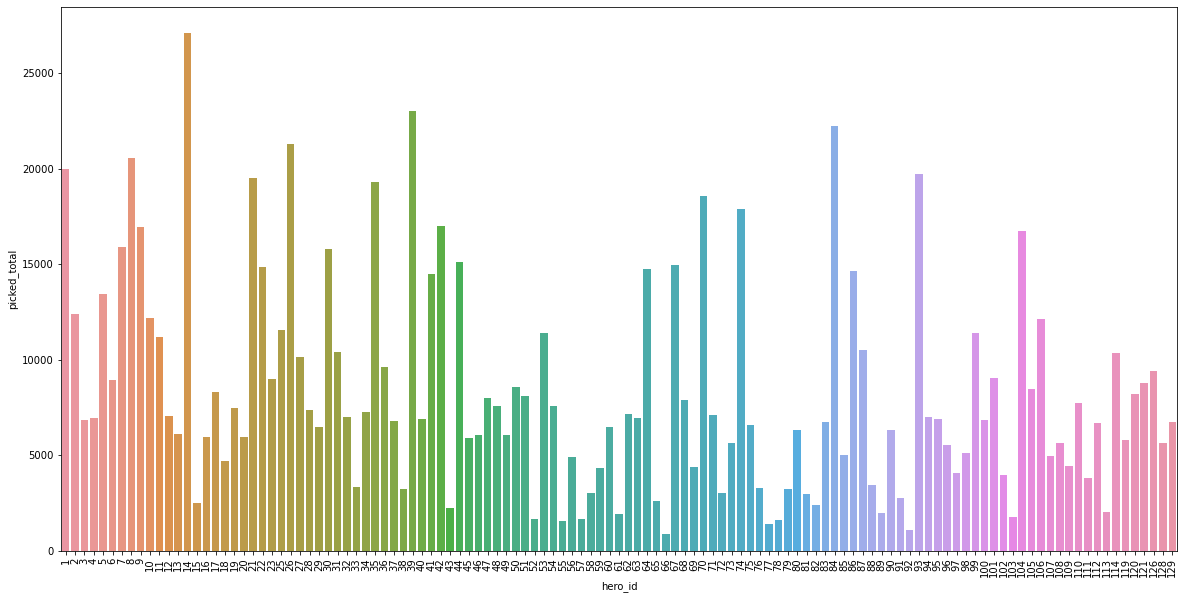

In [117]:
plt.figure(figsize=(20,10))

sns.barplot(data=hero_stats,
            x="hero_id",
            y="picked_total")

plt.xticks(rotation=90);

**Let's sort the values to see which heroes are the least and most picked**

In [142]:
sorted_values = hero_stats["picked_total"].sort_values()

sorted_values

64      896
90     1083
75     1382
53     1563
76     1600
      ...  
7     20538
24    21266
82    22228
37    23006
13    27093
Name: picked_total, Length: 119, dtype: int64

**Above, we see that the least picked hero was picked 896 times, which means that we should meet the requirements for the minumum size data sample set size (around 40 observations)**

### 3. Let's take a look on the match length

**We are interested in seeing the distribution of the duration of matches**

In [176]:
duration_match = round(match_data[["duration"]].div(60),1)
duration_match

,duration
0,45.4
1,19.2
2,54.7
3,49.8
4,38.0
...,...
99995,37.6
99996,28.1
99997,29.8
99998,32.1


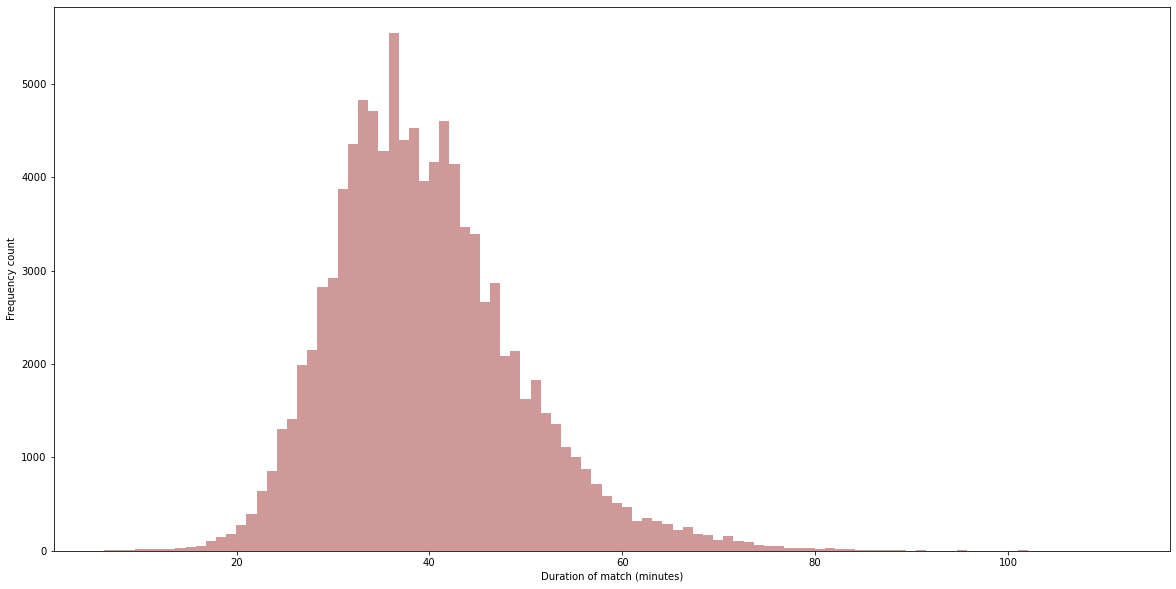

In [183]:
plt.figure(figsize=(20,10))

sns.distplot(duration_match,
             bins=100,
             kde=False,
             color="darkred");

plt.xlabel("Duration of match (minutes)");
plt.ylabel("Frequency count");